# Rasterio Visualizations  

Now we'll do a brief overview of visualizations--although I will admit that integrating these techniques with Matplotlib can be a very deep dive... this is just a primer.  

Imports:

In [1]:
import rasterio as rio
from rasterio.plot import show
from matplotlib import pyplot as plt
from rasterio.plot import adjust_band
import numpy as np
import os

Important: only run this once or you'll wind up in the wrong directory.
```python
os.chdir('../')
os.getcwd()
```

In [ ]:
os.chdir('../')
os.getcwd()

Open the Flatirons DEM raster:
```python
src = rio.open('workshopdata/dem.tif')
```

In [29]:
src = rio.open('workshopdata/dem.tif')

The matplotlib way... What we're doing here is reading it as an array and having matplotlib plot the array as an image:
```python
plt.imshow(src.read(1))
```

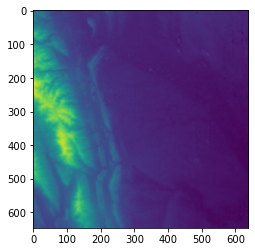

In [30]:
plt.imshow(src.read(1))

OR, as we've used already, the built in Rasterio method:
```python
show(src)
```

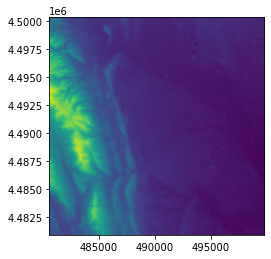

<AxesSubplot:>

In [31]:
show(src)

Note that this one is in the proper units...   

If you use `show()` to plot the single band, you lose the units...  
```python
show(src.read(1))
```

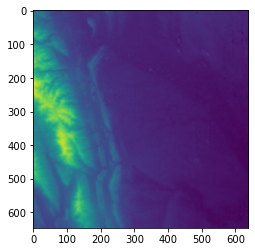

<AxesSubplot:>

In [32]:
show(src.read(1))

But, you can provide the transform and it will provide the proper units... this may seem pointless, but it is actually a useful method, as you'll soon see...
```python
show(src.read(1), transform = src.transform)
```

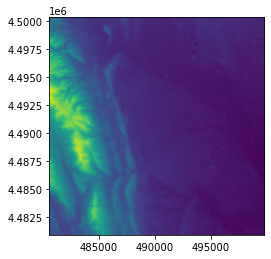

<AxesSubplot:>

In [33]:
show(src.read(1),transform=src.transform)

#### Colormaps!
Let's make it good ol' "DEM gray"...
```python
show(src.read(1), transform = src.transform, cmap = 'gray')
```

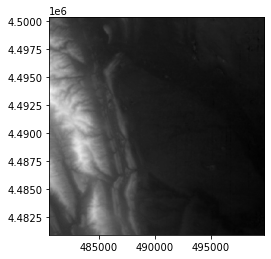

<AxesSubplot:>

In [34]:
show(src.read(1), transform=src.transform, cmap='gray')

Here are Matplotlib's colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html 

Let's have some fun with this:
```python
show(src.read(1), transform = src.transform, cmap = 'Reds')
```

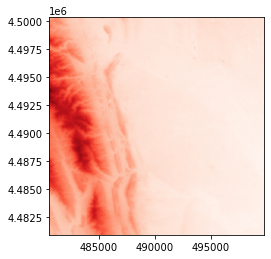

<AxesSubplot:>

In [35]:
show(src.read(1), transform = src.transform, cmap = 'Reds')

### Size  

Tired of looking at these tiny plots? We can use the Matplotlib conventions...  
```python
fig, ax = plt.subplots(1, figsize=(12,12))
show(src.read(1), transform = src.transform, cmap = 'gray', ax=ax)
```

<AxesSubplot:>

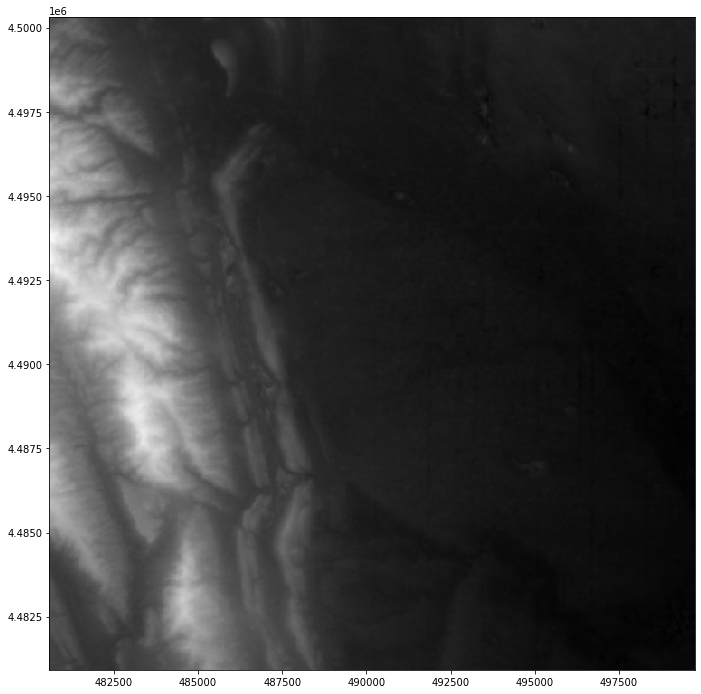

In [36]:
fig, ax = plt.subplots(1,figsize=(12,12))
show(src.read(1), transform = src.transform, cmap='gray', ax=ax)

It's quite easy to create contours from a DEM:
```python
fig, ax = plt.subplots(1, figsize=(12,12))
show(src.read(1), transform = src.transform,contour=True, ax=ax)
```

<AxesSubplot:>

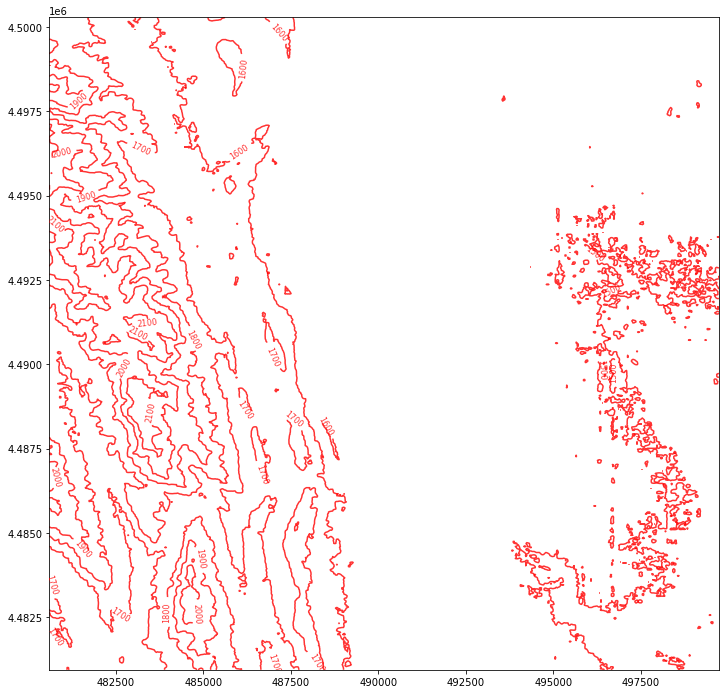

In [37]:
fig, ax = plt.subplots(figsize=(12,12))
show(src.read(1), transform = src.transform, contour=True, ax=ax)

**Or** do both Contours and a DEM together:
```python
fig, ax = plt.subplots(1, figsize=(12,12))
show(src.read(1), transform = src.transform, cmap = 'gray', ax=ax)
show(src.read(1), transform = src.transform,contour=True, ax=ax)
```

<AxesSubplot:>

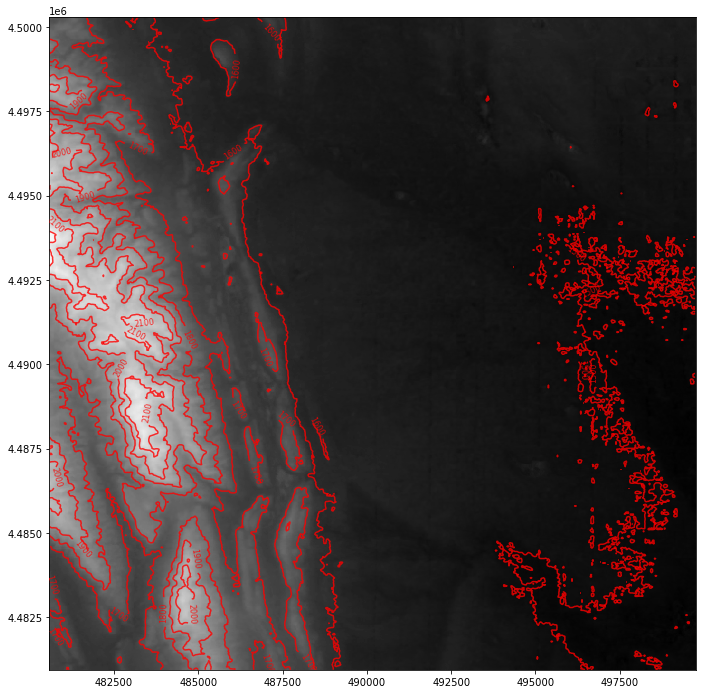

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
show(src.read(1), transform = src.transform, cmap='gray', ax=ax)
show(src.read(1), transform = src.transform,contour=True,ax=ax)

Save some memory... 

In [39]:
del src

#### Okay, let's work on some multiband imagery... 

We'll use our cropped NAIP image of campus:
```python
naip = rio.open('NAIP_swQuad.tif')
```

In [42]:
naip = rio.open('NAIP_swQuad.tif')

```python
show(naip)
```

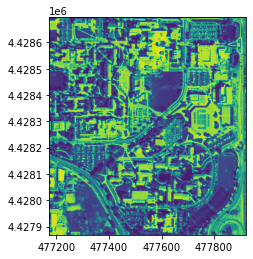

<AxesSubplot:>

In [53]:
show(naip)

You can also specify particular bands:
```python
show((naip,2))
```

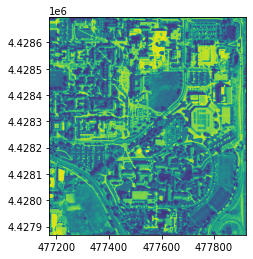

<AxesSubplot:>

In [44]:
show((naip,2))

Near infrared:
```python
show((naip,4))
```

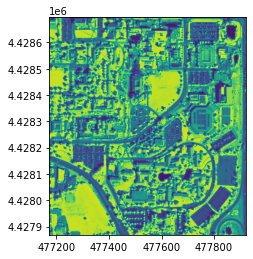

<AxesSubplot:>

In [45]:
show((naip,4))

Let's work on displaying the true color version...  

To display a true color RGB image, you need to normalize the bands....    

Start by reading the image into a Numpy array. This will create an n-dimensional array--essentially the four different bands stacked.
```python
image = naip.read()
```

In [46]:
image = naip.read()

Take a quick look... 
 
```python
show(image)
```

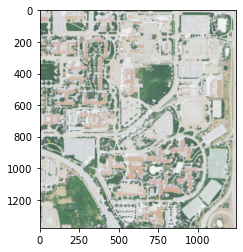

<AxesSubplot:>

In [47]:
show(image)

But, to create the true color visualization, we really just need the rgb bands--that is, the first 3 bands. So we'll use Numpy to grab just those three:
```python
rgb = image[0:3]
```

In [48]:
rgb = image[0:3]

```python
show(rgb)
```

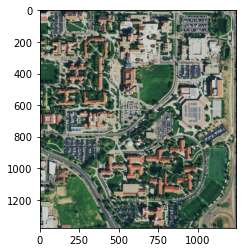

<AxesSubplot:>

In [49]:
show(rgb)

Now, finally we can plot our rgb image properly... 

Might crush memory!!!

```python
fig, ax = plt.subplots(1, figsize=(12,12))
show(rgb_norm, transform = naip.transform, ax=ax, title = 'Aerial Image of CU Campus')
```

<AxesSubplot:title={'center':'Aerial Image of CU Campus'}>

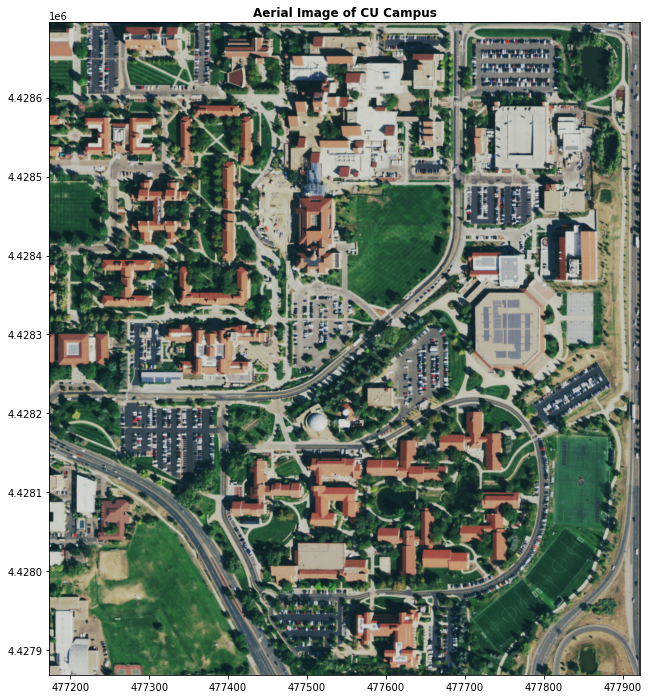

In [50]:
fig, ax = plt.subplots(figsize=(12,12))
show(rgb, transform = naip.transform, ax=ax, title='Aerial Image of CU Campus')

### Sweet!